In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest , f_regression
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


%matplotlib inline



## EDA

In [2]:
data = pd.read_csv("SongPopularity.csv")
pd.set_option("display.max_columns",None)
data.head()

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,Spotify URI,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
0,I Need You,I Need You,1/30/2001,['LeAnn Rimes'],"['country dawn', 'contemporary country', 'coun...",2000,44,229826,https://open.spotify.com/track/046MBhhgQJJghnb...,https://i.scdn.co/image/ab67616d00001e025cf523...,spotify:track:046MBhhgQJJghnbgZCkaAR,62,0.0200,0.478,0.736,0.000096,0.118,-7.124,0.0367,144.705,0.564,7,1,4
1,Sweet Lady,Tyrese,8/31/1998,['Tyrese'],"['hip pop', 'contemporary r&b', 'urban contemp...",1999,43,290600,https://open.spotify.com/track/1Dx8rIZaXzZPvUQ...,https://i.scdn.co/image/ab67616d00001e0283422e...,spotify:track:1Dx8rIZaXzZPvUQRF2j9hB,63,0.2330,0.588,0.522,0.000000,0.240,-6.254,0.0383,66.024,0.584,9,0,4
2,You Take My Breath Away - Mono Version,Sooner or Later,1979,['Rex Smith'],['bubblegum pop'],1979,86,197453,https://open.spotify.com/track/3BCMsz55asr7Yr6...,https://i.scdn.co/image/ab67616d00001e02d1741c...,spotify:track:3BCMsz55asr7Yr6DqB9N8D,49,0.4760,0.313,0.600,0.000026,0.523,-7.913,0.0357,141.912,0.272,11,1,4
3,If I Give My Heart to You (with The Mellomen),Golden Girl (The Columbia Recordings 1944-1966),1945,"['Doris Day', 'The Mellomen']","['adult standards', 'easy listening', 'movie t...",1954,20,169066,https://open.spotify.com/track/20G1XJaTwIm2Iuw...,https://i.scdn.co/image/ab67616d00001e02f2ee02...,spotify:track:20G1XJaTwIm2IuwA3Pjg1d,43,0.9730,0.503,0.059,0.000000,0.103,-16.131,0.0497,76.642,0.331,9,1,4
4,Don't Forget About Us (As Made Famous By Maria...,Drew's Famous # 1 Karaoke Hits: Sing the Hits ...,8/16/2011,['The Karaoke Crew'],['karaoke'],2006,50,251013,https://open.spotify.com/track/28BSc2ZmO0Oe3iv...,https://i.scdn.co/image/ab67616d00001e02b0d3e3...,spotify:track:28BSc2ZmO0Oe3iv4mFdedS,0,0.0149,0.843,0.348,0.001280,0.247,-10.669,0.0545,143.595,0.385,7,0,4


## Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Song                 6191 non-null   object 
 1   Album                6191 non-null   object 
 2   Album Release Date   6191 non-null   object 
 3   Artist Names         6191 non-null   object 
 4   Artist(s) Genres     6191 non-null   object 
 5   Hot100 Ranking Year  6191 non-null   int64  
 6   Hot100 Rank          6191 non-null   int64  
 7   Song Length(ms)      6191 non-null   int64  
 8   Spotify Link         6191 non-null   object 
 9   Song Image           6191 non-null   object 
 10  Spotify URI          6191 non-null   object 
 11  Popularity           6191 non-null   int64  
 12  Acousticness         6191 non-null   float64
 13  Danceability         6191 non-null   float64
 14  Energy               6191 non-null   float64
 15  Instrumentalness     6191 non-null   f

In [6]:
data.shape

(6191, 24)

In [7]:
data.columns

Index(['Song', 'Album', 'Album Release Date', 'Artist Names',
       'Artist(s) Genres', 'Hot100 Ranking Year', 'Hot100 Rank',
       'Song Length(ms)', 'Spotify Link', 'Song Image', 'Spotify URI',
       'Popularity', 'Acousticness', 'Danceability', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo',
       'Valence', 'Key', 'Mode', 'Time Signature'],
      dtype='object')

In [8]:
data.isnull().sum()

Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
count,6191.000000,6191.000000,6.191000e+03,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000
mean,1987.848167,48.320627,2.246265e+05,54.117913,0.300063,0.617710,0.596881,0.045992,0.180755,-8.718824,0.072038,119.009198,0.596321,5.240833,0.705863,3.941043
std,20.354870,29.185349,6.436037e+04,21.511330,0.291133,0.156799,0.205486,0.170713,0.150009,3.774887,0.079253,28.224417,0.242167,3.581859,0.455690,0.317370
min,1946.000000,1.000000,5.180000e+04,0.000000,0.000004,0.000000,0.012000,0.000000,0.015000,-37.841000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1971.000000,23.000000,1.817595e+05,42.000000,0.049250,0.520500,0.455500,0.000000,0.087200,-11.122500,0.032300,97.851000,0.404000,2.000000,0.000000,4.000000
50%,1988.000000,47.000000,2.207340e+05,58.000000,0.195000,0.633000,0.615000,0.000004,0.123000,-8.128000,0.041600,117.907000,0.613000,5.000000,1.000000,4.000000
75%,2005.000000,74.000000,2.571130e+05,70.000000,0.511500,0.728000,0.758000,0.000523,0.232000,-5.787500,0.068800,134.905000,0.804000,8.000000,1.000000,4.000000
max,2022.000000,100.000000,1.561133e+06,94.000000,0.995000,0.988000,0.997000,0.972000,0.985000,-0.810000,0.911000,232.473000,0.991000,11.000000,1.000000,5.000000


Extract Year from release date

In [11]:
def extract_year(date_str):
    try:
        return pd.to_datetime(date_str, errors= 'coerce').year
    except:
        return None


data['Album Release Date'] = data['Album Release Date'].apply(extract_year)


data['Album Release Date'] = data['Album Release Date'].fillna(data['Album Release Date'].loc[data['Album Release Date'].notna()].astype(str))

data.rename(columns={'Album Release Date': 'Release Year'}, inplace=True)


Categorize The Artist name column

In [12]:
def categorize_names(names_list):
    num_names = len(names_list)
    if num_names == 1:
        return 'single'
    elif num_names == 2:
        return 'duo'
    else:
        return 'band'

# Apply categorization function to create a new column
data['ArtistCount'] = data['Artist Names'].apply(lambda x: categorize_names(eval(x)))

In [13]:
data['ArtistCount'].value_counts()

ArtistCount
single    5242
duo        722
band       227
Name: count, dtype: int64

In [14]:
data.drop("Artist Names", axis= 1, inplace= True)

Categorize Genre column

In [15]:
def categorize_genres(genres_list):
    if any('pop' in genre.lower() for genre in genres_list):
        return 'Pop'
    elif any('hip hop' in genre.lower() for genre in genres_list):
        return 'Hip Hop/Rap'
    elif any('country' in genre.lower() for genre in genres_list):
        return 'Country'
    elif any('electropop' in genre.lower() for genre in genres_list):
        return 'Electropop'
    elif any('standards' in genre.lower() for genre in genres_list):
        return 'Adult Standards'
    else:
        return 'Others'
    
# Apply categorization function to create a new column
data['Genre'] = data['Artist(s) Genres'].apply(lambda x: categorize_genres(eval(x)))


In [16]:
data['Genre'].value_counts()

Genre
Pop                2620
Others             2618
Adult Standards     353
Country             341
Hip Hop/Rap         259
Name: count, dtype: int64

In [17]:
categorical = [i for i in data.columns if data[i].dtypes == "O"]

for feature in  categorical:
    print(data[feature].value_counts())
    print("\n \n ")

Song
Heaven                  6
I Like It               6
To Each His Own         5
Someday                 4
Because Of You          4
                       ..
Sylvia's Mother         1
Stranger in Paradise    1
Bump n' Grind           1
A Swingin' Safari       1
Venus in Blue Jeans     1
Name: count, Length: 5694, dtype: int64

 
 
Album
Greatest Hits                         48
Super Hits                            13
16 Most Requested Songs               10
The Definitive Collection             10
Celebration (double disc version)      9
                                      ..
Boys Like Girls                        1
No Brakes                              1
Son By Four                            1
Fresh Karaoke Hits - 2015 - Vol. 1     1
Little Voice                           1
Name: count, Length: 4520, dtype: int64

 
 
Artist(s) Genres
[]                                                                                                                             394
['karaoke']   

In [18]:

current_year = datetime.now().year

# Calculate the age of the song
data['Song Age'] = current_year - data['Release Year']

In [19]:
data.head()

,Song,Album,Release Year,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,Spotify URI,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,ArtistCount,Genre,Song Age
0,I Need You,I Need You,2001,"['country dawn', 'contemporary country', 'coun...",2000,44,229826,https://open.spotify.com/track/046MBhhgQJJghnb...,https://i.scdn.co/image/ab67616d00001e025cf523...,spotify:track:046MBhhgQJJghnbgZCkaAR,62,0.0200,0.478,0.736,0.000096,0.118,-7.124,0.0367,144.705,0.564,7,1,4,single,Country,23
1,Sweet Lady,Tyrese,1998,"['hip pop', 'contemporary r&b', 'urban contemp...",1999,43,290600,https://open.spotify.com/track/1Dx8rIZaXzZPvUQ...,https://i.scdn.co/image/ab67616d00001e0283422e...,spotify:track:1Dx8rIZaXzZPvUQRF2j9hB,63,0.2330,0.588,0.522,0.000000,0.240,-6.254,0.0383,66.024,0.584,9,0,4,single,Pop,26
2,You Take My Breath Away - Mono Version,Sooner or Later,1979,['bubblegum pop'],1979,86,197453,https://open.spotify.com/track/3BCMsz55asr7Yr6...,https://i.scdn.co/image/ab67616d00001e02d1741c...,spotify:track:3BCMsz55asr7Yr6DqB9N8D,49,0.4760,0.313,0.600,0.000026,0.523,-7.913,0.0357,141.912,0.272,11,1,4,single,Pop,45
3,If I Give My Heart to You (with The Mellomen),Golden Girl (The Columbia Recordings 1944-1966),1945,"['adult standards', 'easy listening', 'movie t...",1954,20,169066,https://open.spotify.com/track/20G1XJaTwIm2Iuw...,https://i.scdn.co/image/ab67616d00001e02f2ee02...,spotify:track:20G1XJaTwIm2IuwA3Pjg1d,43,0.9730,0.503,0.059,0.000000,0.103,-16.131,0.0497,76.642,0.331,9,1,4,duo,Adult Standards,79
4,Don't Forget About Us (As Made Famous By Maria...,Drew's Famous # 1 Karaoke Hits: Sing the Hits ...,2011,['karaoke'],2006,50,251013,https://open.spotify.com/track/28BSc2ZmO0Oe3iv...,https://i.scdn.co/image/ab67616d00001e02b0d3e3...,spotify:track:28BSc2ZmO0Oe3iv4mFdedS,0,0.0149,0.843,0.348,0.001280,0.247,-10.669,0.0545,143.595,0.385,7,0,4,single,Others,13


## Visualizations

<Axes: >

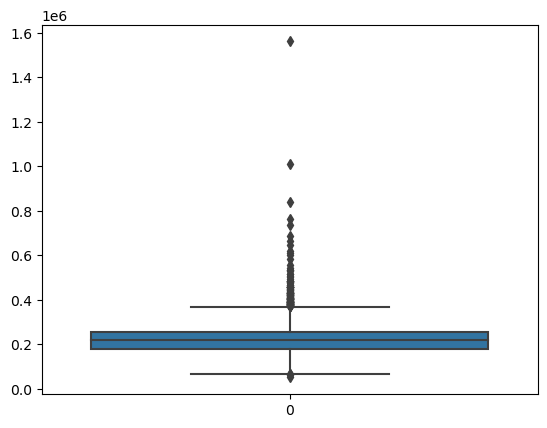

In [20]:
sns.boxplot(data["Song Length(ms)"])

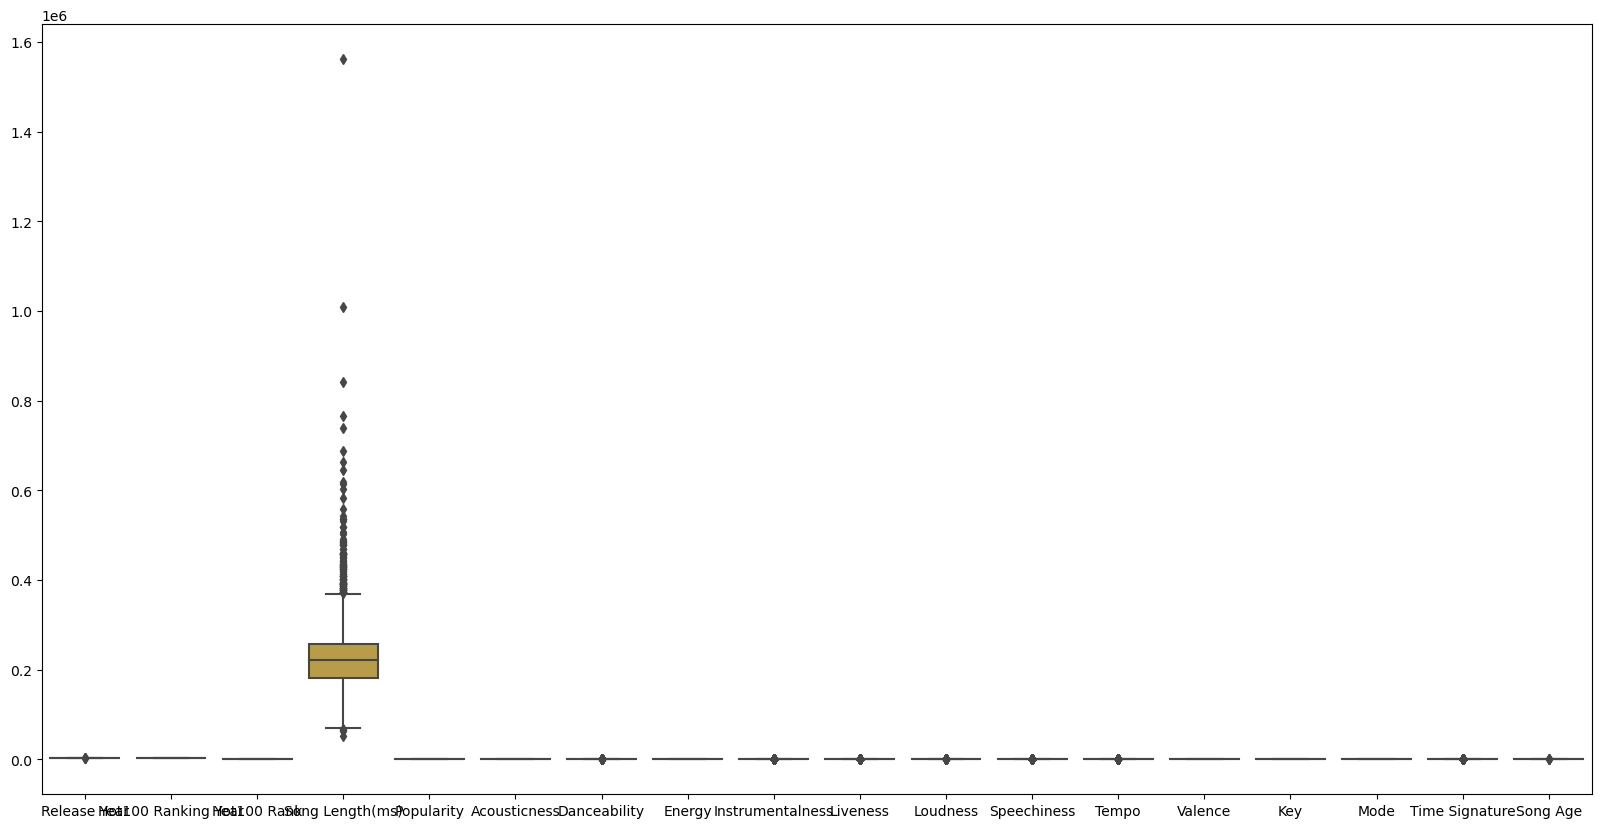

In [21]:
plt.figure(figsize=(20,10))
sns.boxplot(data)
plt.show()

<Axes: >

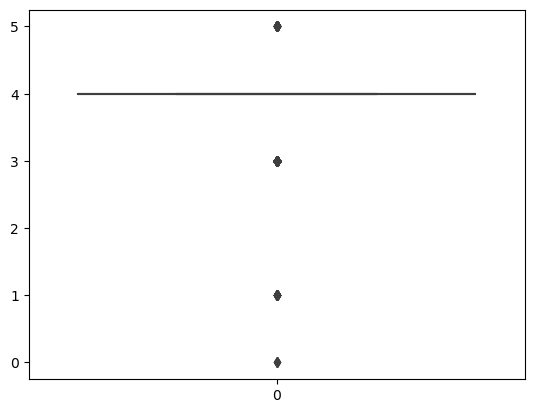

In [22]:
sns.boxplot(data= data["Time Signature"])

In [23]:
outliers_columns = categorical = [i for i in data.columns if data[i].dtypes != "O"]
for col in outliers_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    num_outliers = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    print(f"{col},: {num_outliers}")

Release Year,: 4
Hot100 Ranking Year,: 0
Hot100 Rank,: 0
Song Length(ms),: 117
Popularity,: 0
Acousticness,: 0
Danceability,: 41
Energy,: 0
Instrumentalness,: 1296
Liveness,: 348
Loudness,: 61
Speechiness,: 818
Tempo,: 89
Valence,: 0
Key,: 0
Mode,: 0
Time Signature,: 416
Song Age,: 4


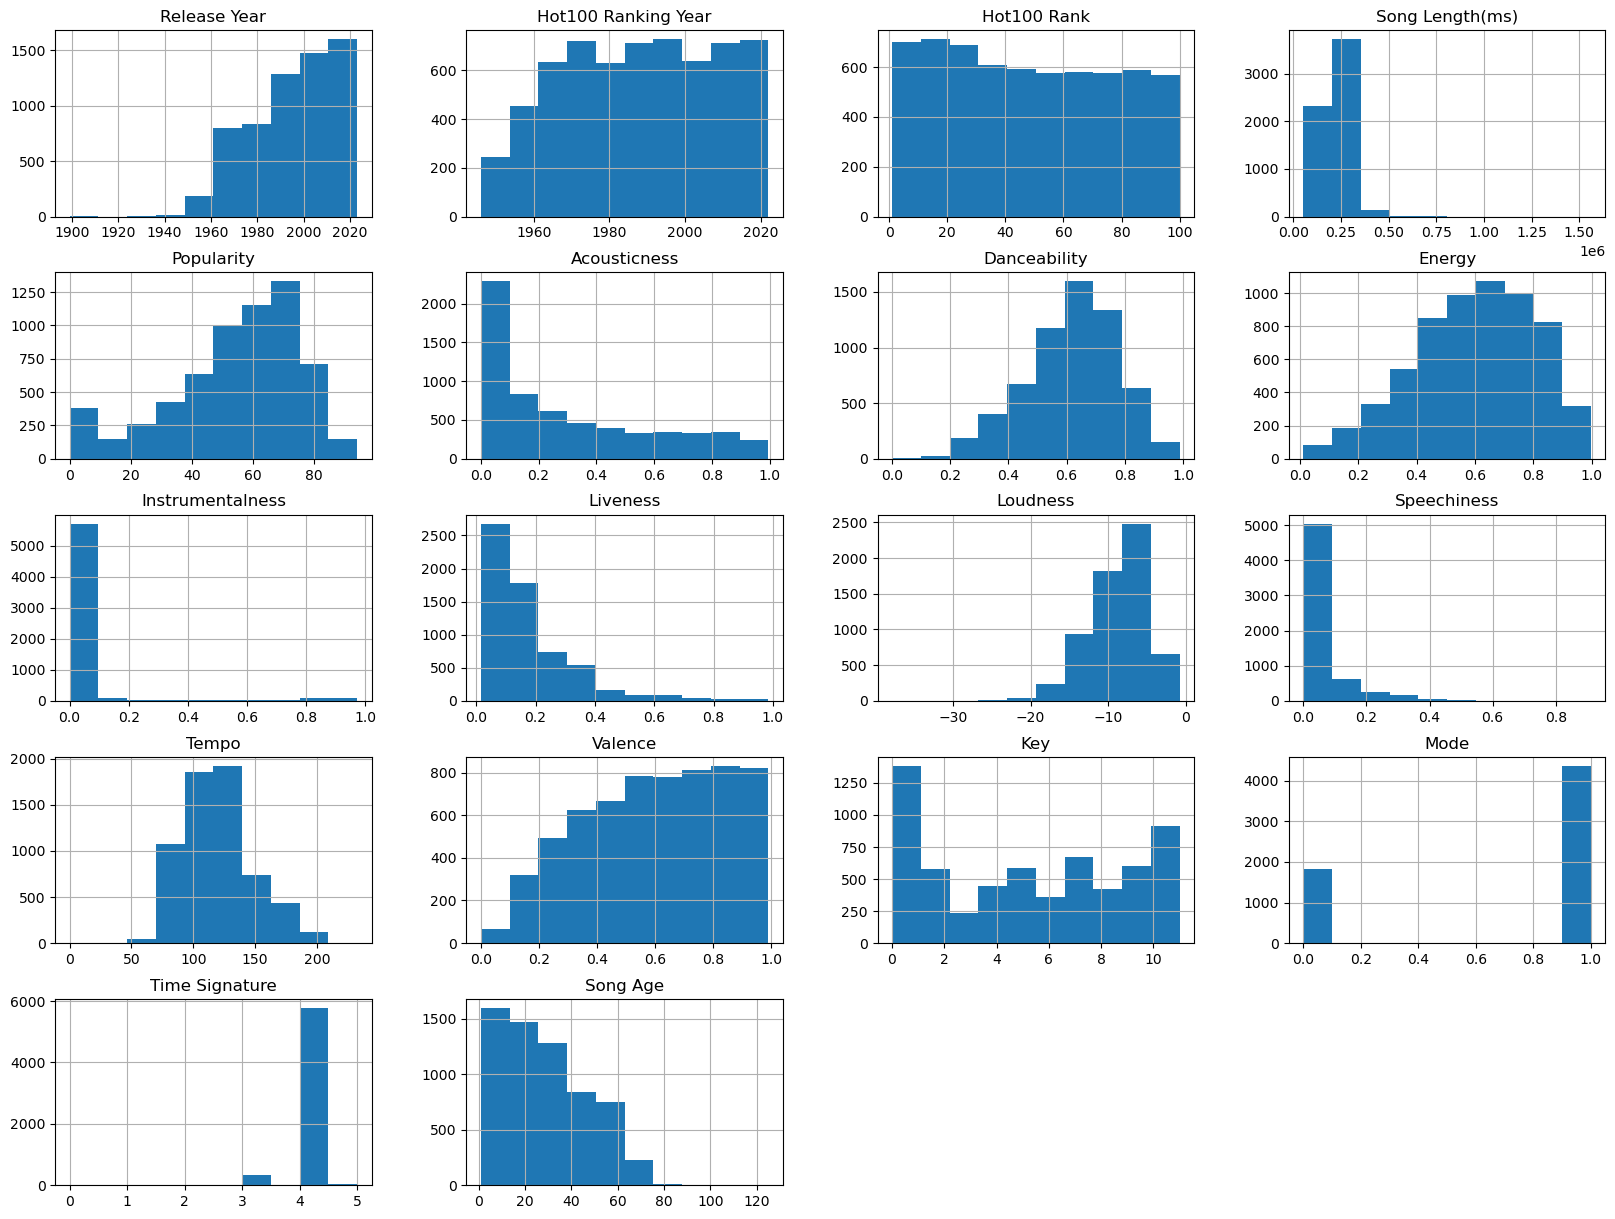

In [24]:
data.hist(figsize=(20,15))
plt.show()

#### We find from this graph:
* Song Length (ms): Most songs have a length that falls within a certain range, with a peak around 
200,000 to 300,000 milliseconds (or 3 to 5 minutes), which is typical for popular music tracks.
* Acousticness : The majority of songs have low acousticness, with a peak near 0.
* Danceability : The distribution is skewed towards higher danceability, with a peak around 
0.6 to 0.7 .This indicates that songs in the dataset are generally suitable for dancing.
* Energy : The distribution has a peak around 0.6 to 0.8, suggesting that many songs have a moderate to high level of energy.
* Instrumentalness : There is a high peak near 0, indicating that most songs have very low instrumentalness, which means they likely contain vocal content.
* Loudness : The distribution is skewed towards higher loudness levels, with most songs being around -5 to -10 dB. This reflects the modern trend of producing louder tracks.
* Speechiness : Most songs have low speechiness, with a peak near 0. This indicates that spoken words (e.g. talk show, audio book, poetry) are not a dominant feature.
* Tempo : The distribution shows a concentration of songs with tempos around 100 to 150 beats per minute (BPM), which is common for pop and dance music.
* Time Signature : The vast majority of songs have a 4/4 time signature, which is the most common time signature in Western music.

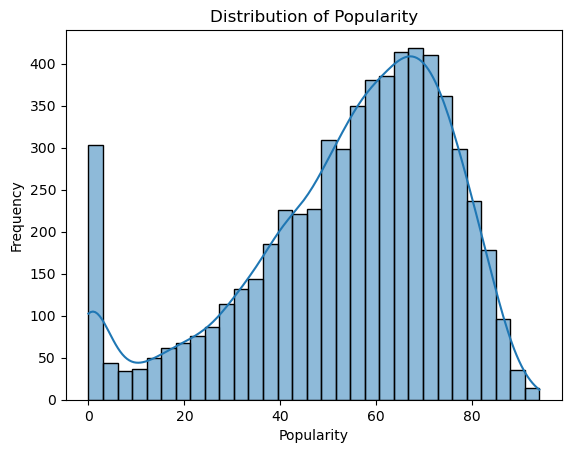

In [25]:
sns.histplot(data=data['Popularity'], kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

* This graph shows that the song popularity is almost normal distribution, although there is a right-skewed distribution, indicating that fewer songs have very high popularity scores. This could suggest that only a small number of songs achieve extremely high popularity

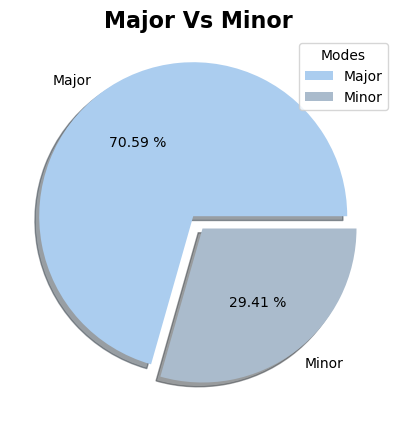

In [26]:
plt.figure(figsize=(5, 5))
Major = data.loc[data['Mode'] == 1].count()[0]
Minor = data.loc[data['Mode'] == 0].count()[0]

labels = ['Major', 'Minor']
colors = ['#abcdef', '#aabbcc']
explode = (0.1, 0)

plt.pie([Major, Minor], labels=labels, colors=colors, autopct='%.2f %%', shadow=True, explode=explode)
plt.title('Major Vs Minor ', fontsize=16, fontweight='bold')

plt.legend(title='Modes', loc='best')

plt.show()

#### We notice :
* There is a preference for songs in a major key (mode 1) over a minor key (mode 0), which is typical as major keys are often associated with happier, more upbeat music.

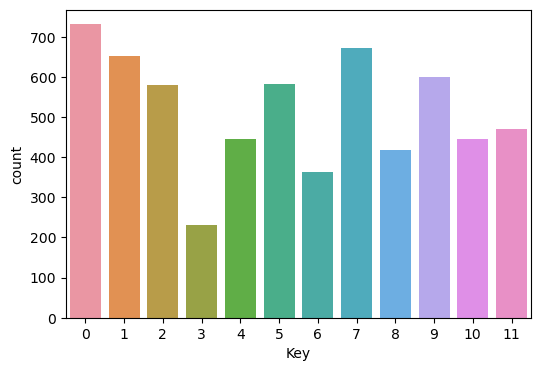

Key: 
 Key
0     731
7     671
1     653
9     600
5     583
2     580
11    470
4     446
10    445
8     419
6     362
3     231
Name: count, dtype: int64
None


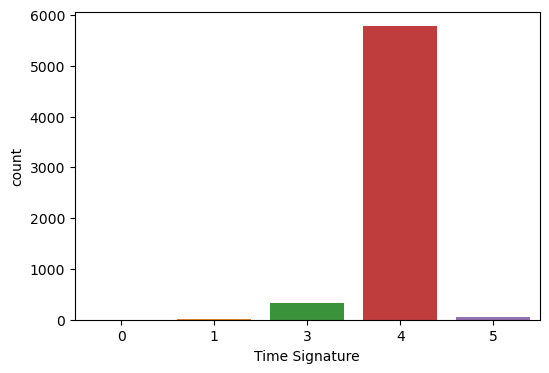

Time Signature: 
 Time Signature
4    5775
3     337
5      53
1      23
0       3
Name: count, dtype: int64
None


In [27]:
def plot(variable):

    var = data[variable]
    
    varValue = var.value_counts()

    plt.figure(figsize =(6,4))
    sns.countplot(data=data,x=variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

columns= ['Key', 'Time Signature']
for i in columns:
    print(plot(i))

Text(0.5, 1.0, 'Popularity Based on Key')

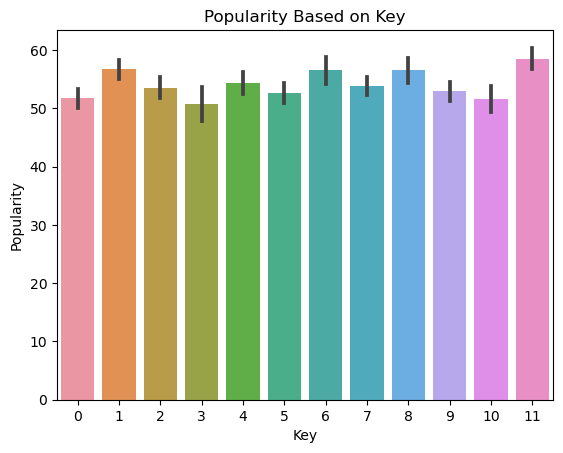

In [28]:
sns.barplot(x = 'Key', y = 'Popularity', data = data)
plt.title('Popularity Based on Key')

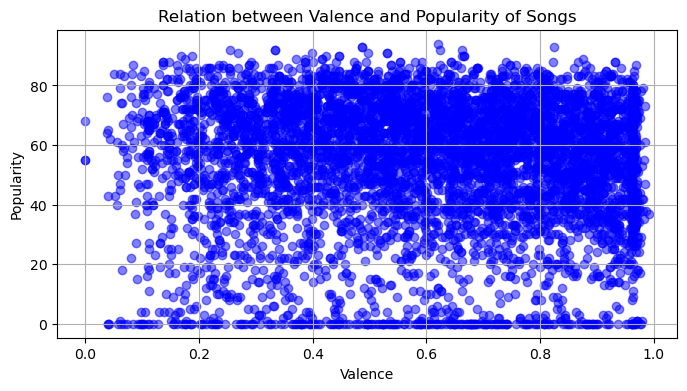

In [29]:
plt.figure(figsize=(8, 4))
plt.scatter(data['Valence'], data['Popularity'], alpha=0.5, color='b')
plt.title('Relation between Valence and Popularity of Songs')
plt.xlabel('Valence')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

#### We find from this graph:
* Concentration of blue dots in the upper right quadrant implys that songs with higher valence are more likely to be popular among listeners. On the other hand, songs with lower valence may have lower popularity.

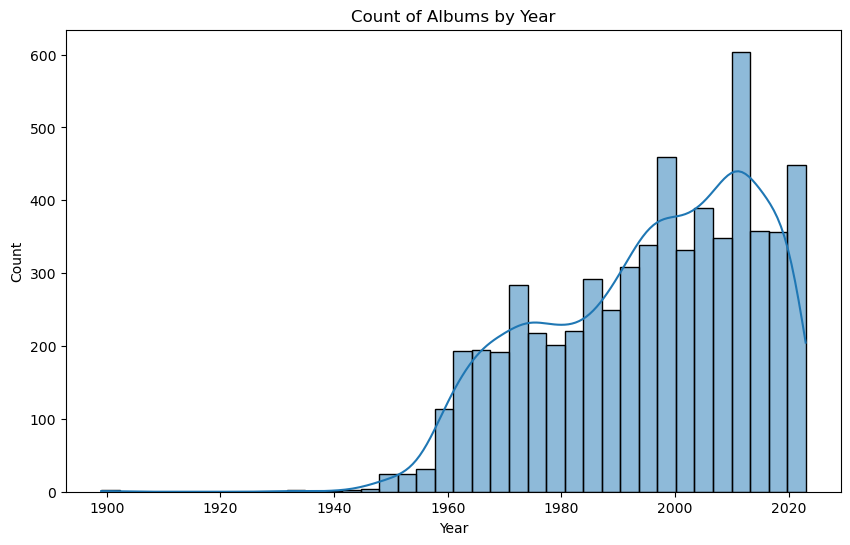

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data['Release Year'], kde=True)
plt.title('Count of Albums by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks()
plt.yticks()
plt.show()

In [31]:
songs_per_album = data['Album'].value_counts().head(7)
songs_per_album_df = songs_per_album.reset_index()
songs_per_album_df.columns = ['album', 'count']
songs_per_album_df

,album,count
0,Greatest Hits,48
1,Super Hits,13
2,16 Most Requested Songs,10
3,The Definitive Collection,10
4,Celebration (double disc version),9
5,Golden Hits,8
6,Love Songs,8


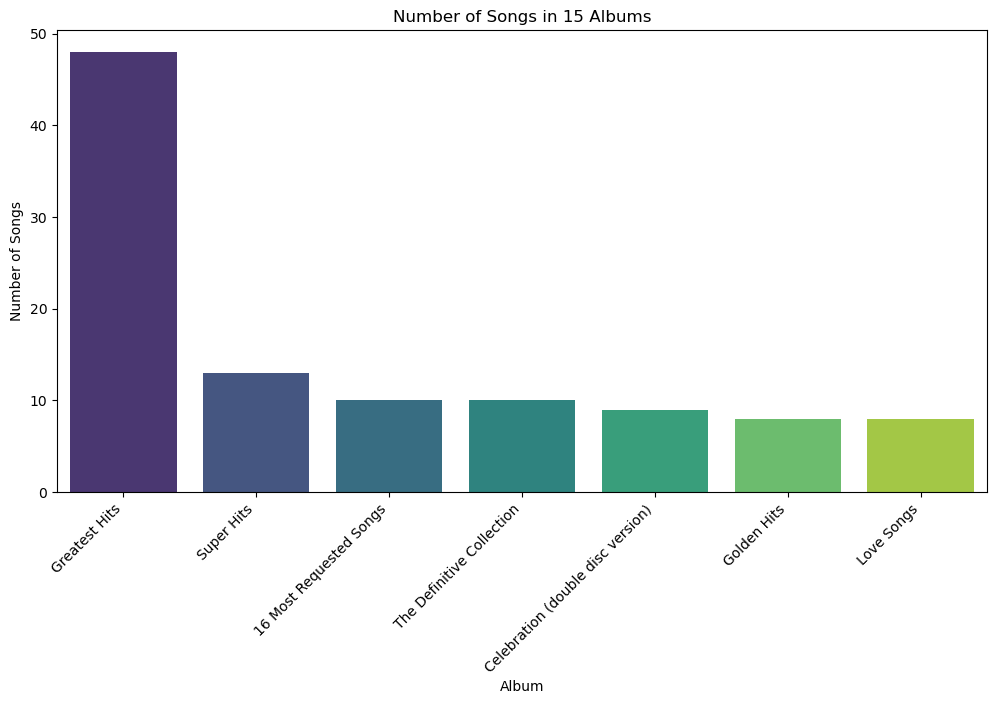

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x='album', y='count', data=songs_per_album_df, palette='viridis')
plt.xlabel('Album')
plt.ylabel('Number of Songs')
plt.title('Number of Songs in 15 Albums')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [33]:
data.columns

Index(['Song', 'Album', 'Release Year', 'Artist(s) Genres',
       'Hot100 Ranking Year', 'Hot100 Rank', 'Song Length(ms)', 'Spotify Link',
       'Song Image', 'Spotify URI', 'Popularity', 'Acousticness',
       'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness',
       'Speechiness', 'Tempo', 'Valence', 'Key', 'Mode', 'Time Signature',
       'ArtistCount', 'Genre', 'Song Age'],
      dtype='object')

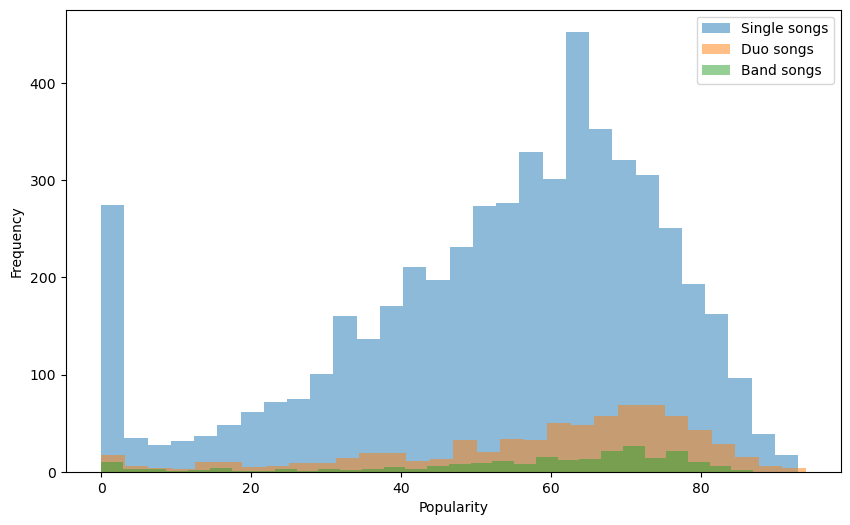

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(data[data['ArtistCount'] == 'single']['Popularity'], bins=30, alpha=0.5, label = 'Single songs')
plt.hist(data[data['ArtistCount'] == 'duo']['Popularity'], bins=30, alpha=0.5, label = 'Duo songs')
plt.hist(data[data['ArtistCount'] == 'band']['Popularity'], bins=30, alpha=0.5, label = 'Band songs')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

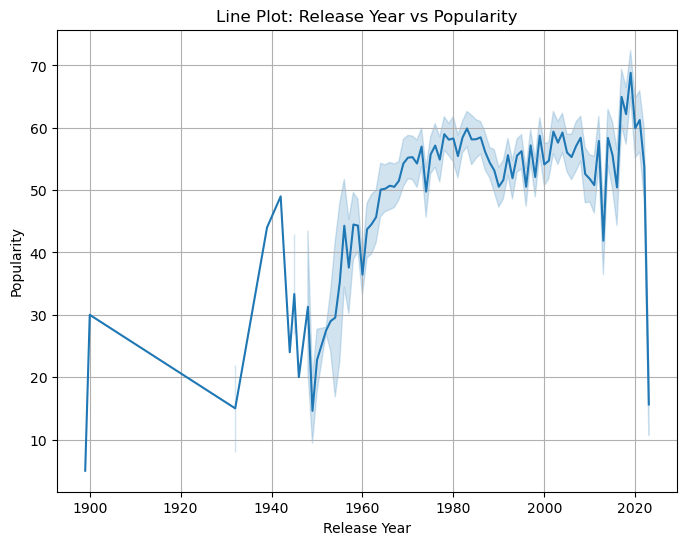

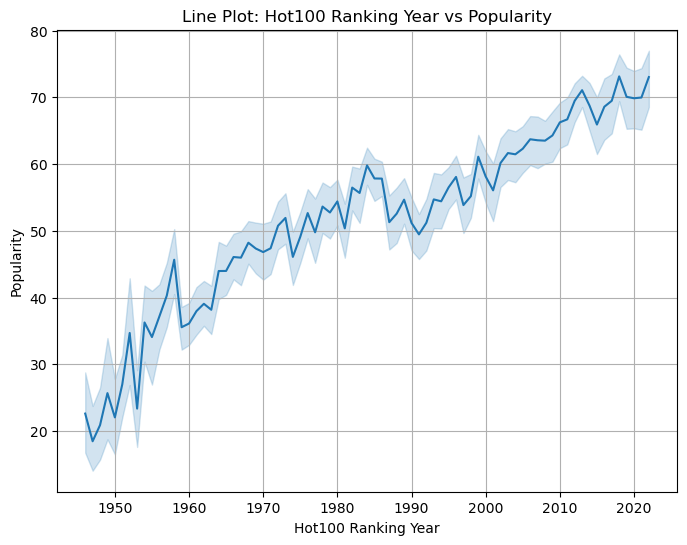

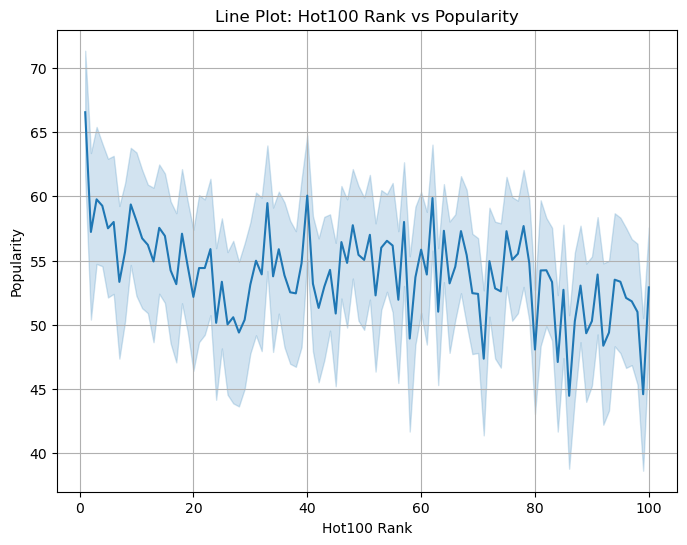

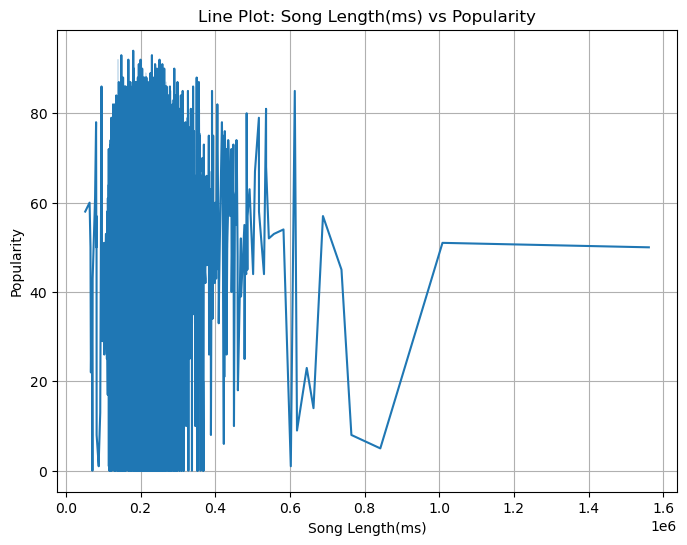

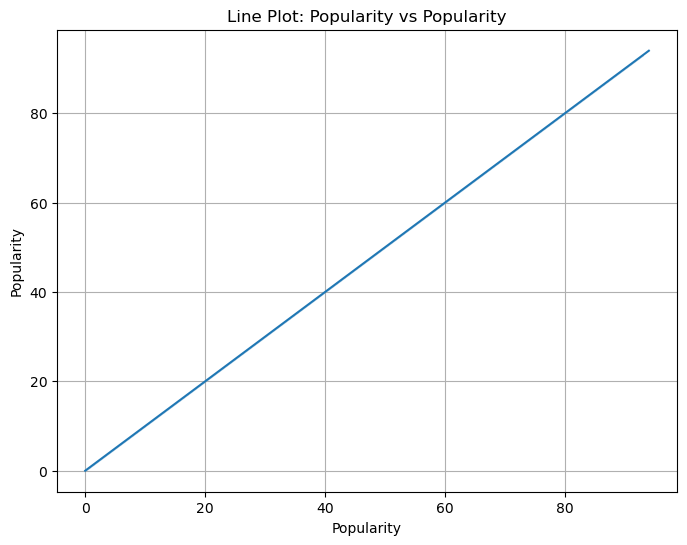

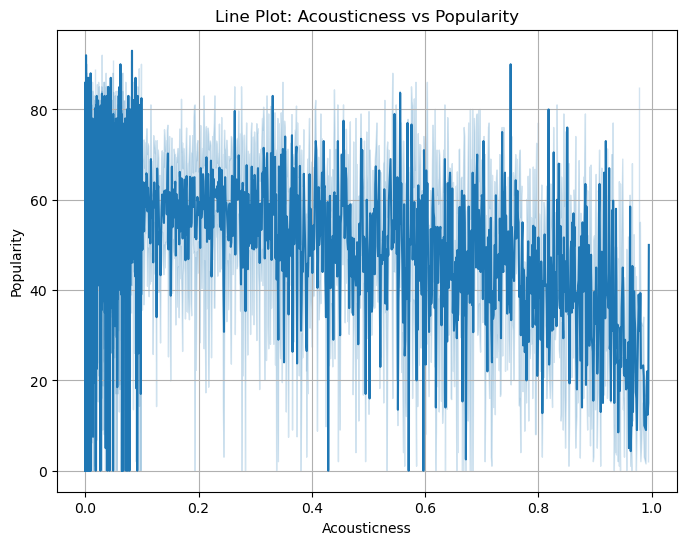

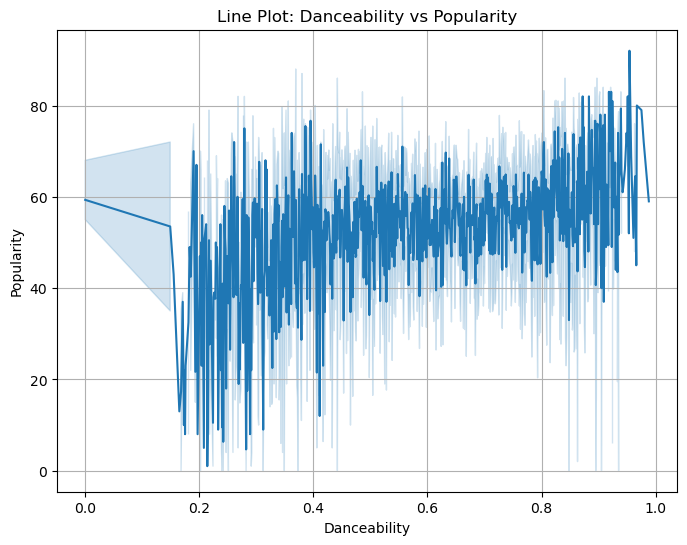

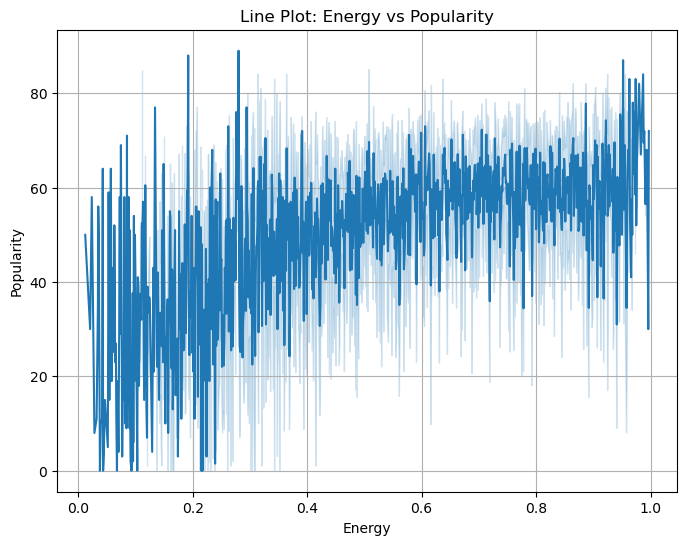

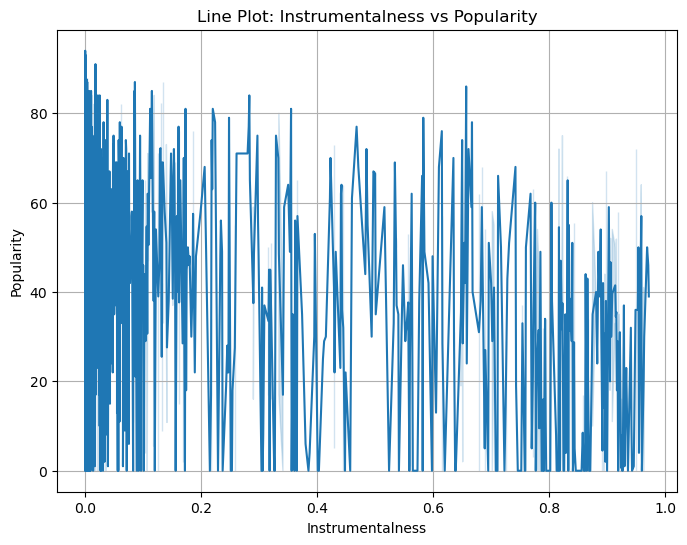

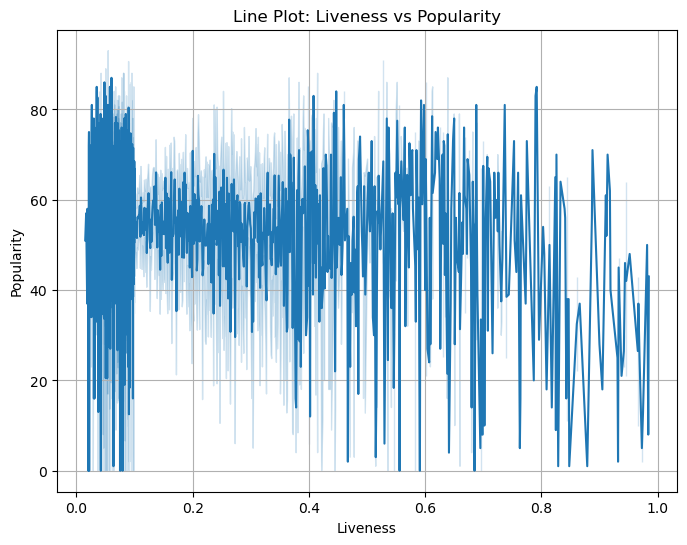

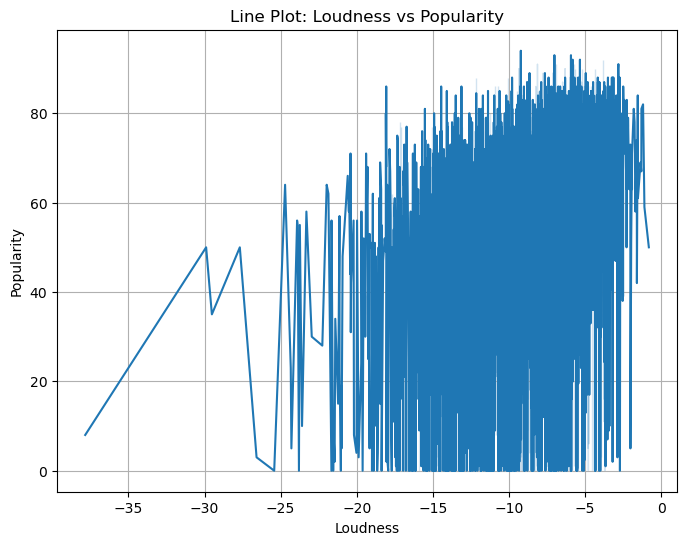

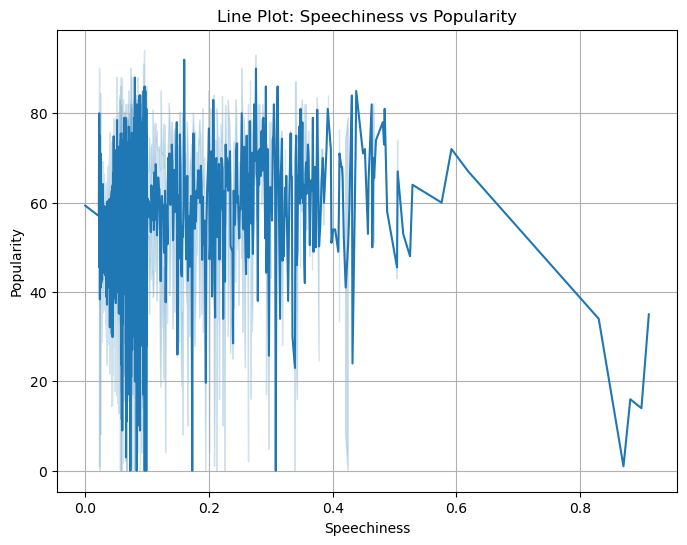

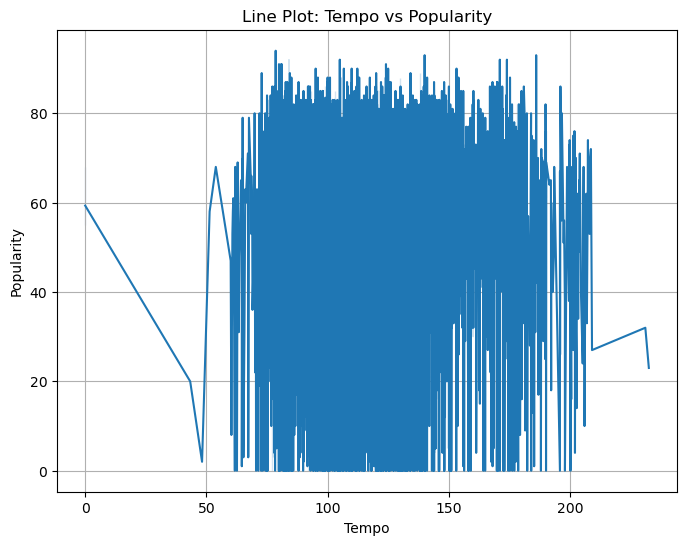

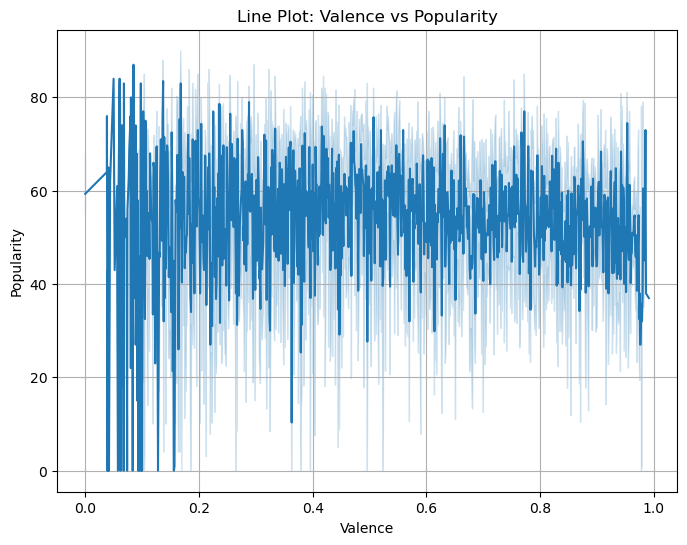

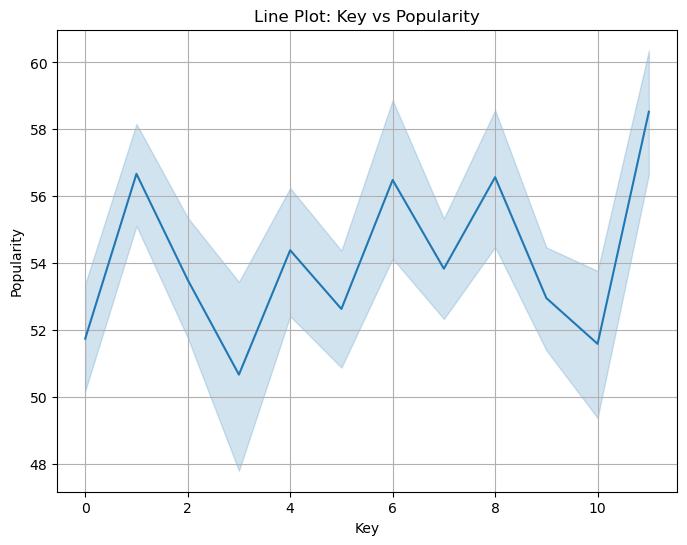

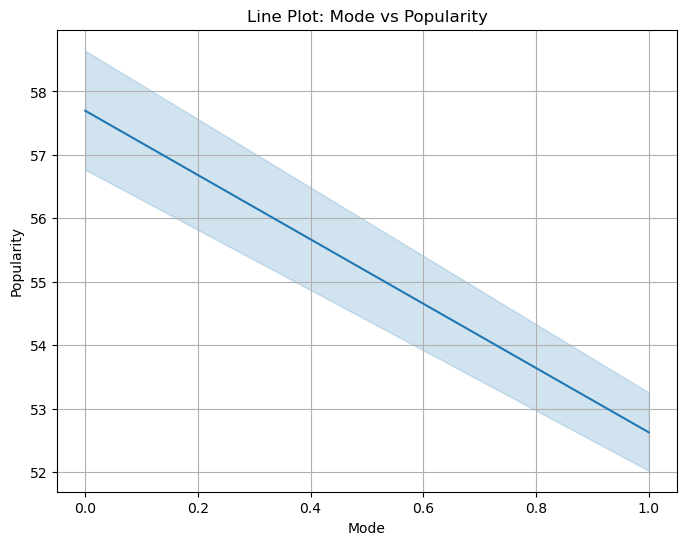

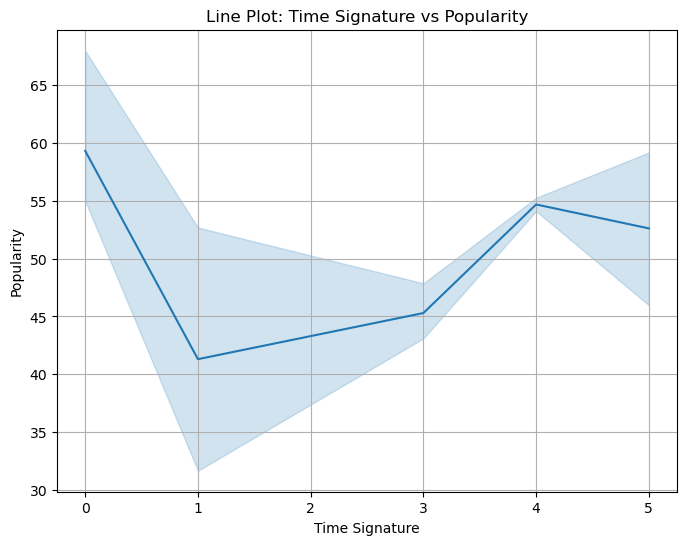

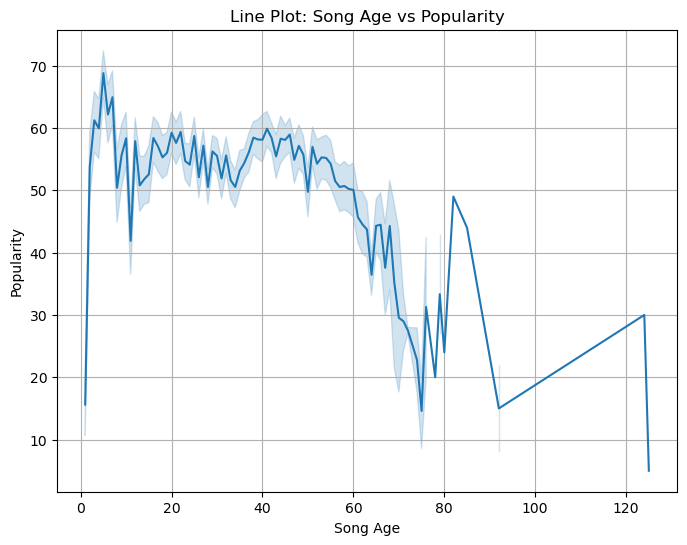

In [35]:
for column in data.select_dtypes(include='number').columns:
    # Plot line plot for each numeric feature against 'Popularity'
    plt.figure(figsize=(8, 6))
    sns.lineplot(x= data[column], y= data['Popularity'])
    plt.xlabel(column)
    plt.ylabel('Popularity')
    plt.title(f'Line Plot: {column} vs Popularity')
    plt.grid(True)
    plt.show()


In [36]:
# Drop useless columns
data.drop(['Song','Spotify Link','Spotify URI','Artist(s) Genres',
           'Album', 'Song Image'], inplace=True,axis=1)

In [37]:
data.columns

Index(['Release Year', 'Hot100 Ranking Year', 'Hot100 Rank', 'Song Length(ms)',
       'Popularity', 'Acousticness', 'Danceability', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo',
       'Valence', 'Key', 'Mode', 'Time Signature', 'ArtistCount', 'Genre',
       'Song Age'],
      dtype='object')

## Encoding

In [38]:


categorical = [i for i in data.columns if data[i].dtypes == "O"]


for col in categorical:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [39]:
data.head()

,Release Year,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,ArtistCount,Genre,Song Age
0,2001,2000,44,229826,62,0.0200,0.478,0.736,0.000096,0.118,-7.124,0.0367,144.705,0.564,7,1,4,2,1,23
1,1998,1999,43,290600,63,0.2330,0.588,0.522,0.000000,0.240,-6.254,0.0383,66.024,0.584,9,0,4,2,4,26
2,1979,1979,86,197453,49,0.4760,0.313,0.600,0.000026,0.523,-7.913,0.0357,141.912,0.272,11,1,4,2,4,45
3,1945,1954,20,169066,43,0.9730,0.503,0.059,0.000000,0.103,-16.131,0.0497,76.642,0.331,9,1,4,1,0,79
4,2011,2006,50,251013,0,0.0149,0.843,0.348,0.001280,0.247,-10.669,0.0545,143.595,0.385,7,0,4,2,3,13


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release Year         6191 non-null   int64  
 1   Hot100 Ranking Year  6191 non-null   int64  
 2   Hot100 Rank          6191 non-null   int64  
 3   Song Length(ms)      6191 non-null   int64  
 4   Popularity           6191 non-null   int64  
 5   Acousticness         6191 non-null   float64
 6   Danceability         6191 non-null   float64
 7   Energy               6191 non-null   float64
 8   Instrumentalness     6191 non-null   float64
 9   Liveness             6191 non-null   float64
 10  Loudness             6191 non-null   float64
 11  Speechiness          6191 non-null   float64
 12  Tempo                6191 non-null   float64
 13  Valence              6191 non-null   float64
 14  Key                  6191 non-null   int64  
 15  Mode                 6191 non-null   i

<Axes: >

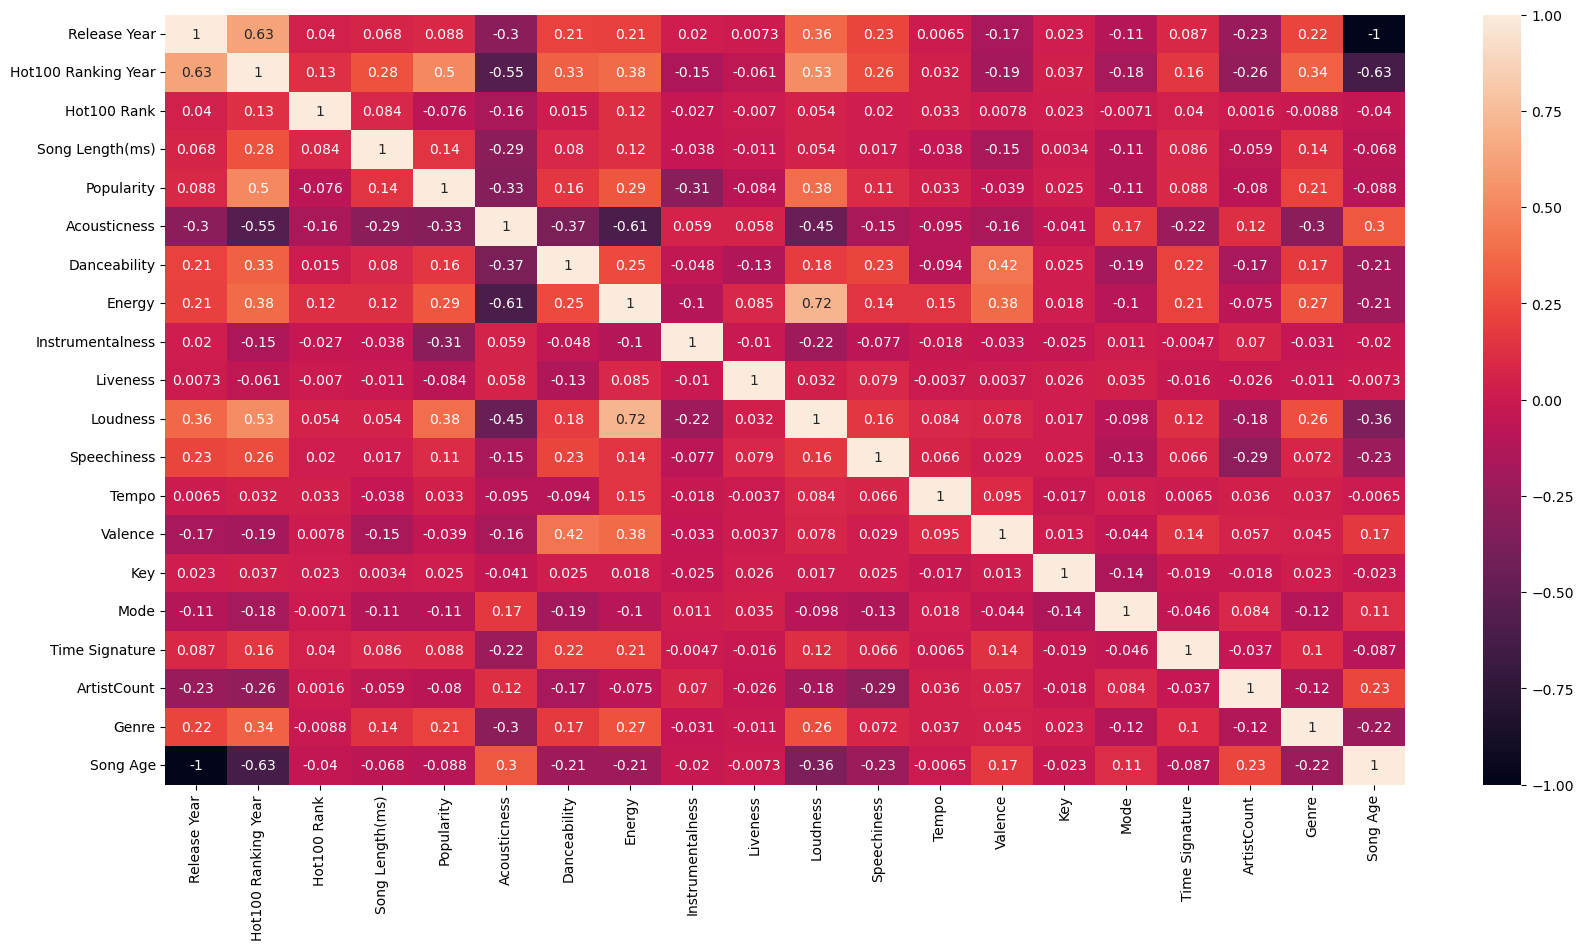

In [41]:
corr_matrix = data.corr()
plt.figure(figsize = (20 , 10))
sns.heatmap(corr_matrix,annot= True)

In [42]:
print(abs(corr_matrix["Popularity"]).sort_values(ascending=False))


Popularity             1.000000
Hot100 Ranking Year    0.503405
Loudness               0.383069
Acousticness           0.326027
Instrumentalness       0.306362
Energy                 0.289564
Genre                  0.214383
Danceability           0.158959
Song Length(ms)        0.144361
Speechiness            0.108835
Mode                   0.107376
Release Year           0.088246
Song Age               0.088246
Time Signature         0.087910
Liveness               0.083621
ArtistCount            0.079549
Hot100 Rank            0.075731
Valence                0.039074
Tempo                  0.032773
Key                    0.025431
Name: Popularity, dtype: float64


## Splitting features and target

In [43]:
X = data.drop(['Popularity'], axis=1)
Y = data["Popularity"]

## Feature Selection

In [44]:
k= 17
selected_feature= X.columns[SelectKBest(f_regression, k=k).fit(X,Y).get_support()]
print(selected_feature)

Index(['Release Year', 'Hot100 Ranking Year', 'Hot100 Rank', 'Song Length(ms)',
       'Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
       'Liveness', 'Loudness', 'Speechiness', 'Valence', 'Mode',
       'Time Signature', 'ArtistCount', 'Genre', 'Song Age'],
      dtype='object')


In [45]:
selected_x = X[['Release Year', 'Hot100 Ranking Year', 'Hot100 Rank', 'Song Length(ms)',
       'Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
       'Liveness', 'Loudness', 'Speechiness', 'Valence', 'Mode',
       'Time Signature', 'ArtistCount', 'Genre', 'Song Age']]

X_selected = pd.DataFrame(data= selected_x)

In [46]:
X_selected.head()

,Release Year,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Mode,Time Signature,ArtistCount,Genre,Song Age
0,2001,2000,44,229826,0.0200,0.478,0.736,0.000096,0.118,-7.124,0.0367,0.564,1,4,2,1,23
1,1998,1999,43,290600,0.2330,0.588,0.522,0.000000,0.240,-6.254,0.0383,0.584,0,4,2,4,26
2,1979,1979,86,197453,0.4760,0.313,0.600,0.000026,0.523,-7.913,0.0357,0.272,1,4,2,4,45
3,1945,1954,20,169066,0.9730,0.503,0.059,0.000000,0.103,-16.131,0.0497,0.331,1,4,1,0,79
4,2011,2006,50,251013,0.0149,0.843,0.348,0.001280,0.247,-10.669,0.0545,0.385,0,4,2,3,13


## Normalization

In [47]:
normalize = MinMaxScaler()
df= normalize.fit_transform(X_selected)
Nor_x= pd.DataFrame(df, columns= X_selected.columns)


In [48]:
Nor_x.head()

,Release Year,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Mode,Time Signature,ArtistCount,Genre,Song Age
0,0.822581,0.710526,0.434343,0.117950,0.020097,0.483806,0.735025,0.000099,0.106186,0.829494,0.040285,0.569122,1.0,0.8,1.0,0.25,0.177419
1,0.798387,0.697368,0.424242,0.158216,0.234168,0.595142,0.517766,0.000000,0.231959,0.852988,0.042042,0.589304,0.0,0.8,1.0,1.00,0.201613
2,0.645161,0.434211,0.858586,0.096502,0.478390,0.316802,0.596954,0.000026,0.523711,0.808188,0.039188,0.274470,1.0,0.8,1.0,1.00,0.354839
3,0.370968,0.105263,0.191919,0.077694,0.977889,0.509109,0.047716,0.000000,0.090722,0.586266,0.054555,0.334006,1.0,0.8,0.5,0.00,0.629032
4,0.903226,0.789474,0.494949,0.131987,0.014971,0.853239,0.341117,0.001317,0.239175,0.733764,0.059824,0.388496,0.0,0.8,1.0,0.75,0.096774


## Splitting train and test

In [49]:
x_train ,x_test, y_train ,y_test = train_test_split(Nor_x, Y, test_size=0.3, random_state = 42)

In [50]:
def model_val2(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)

    ytrainpred = model.predict(x_train)
    y_pred = model.predict(x_test)
    
    msetrain = mean_squared_error(y_train, ytrainpred)
    print(f"{model} mean squared error (MSE) for train: {msetrain}")
    rmsetrain = np.sqrt(msetrain)
    print(f"{model} root mean squared error (RMSE) for train: {rmsetrain}")


    mse = mean_squared_error(y_test, y_pred)
    print(f"{model} mean squared error (MSE) for test: {mse}")
    
    rmse = np.sqrt(mse)
    print(f"{model} root mean squared error (RMSE): {rmse}")

    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model} mean absolute error (MAE) for test: {mae}")

    rscore = r2_score(y_test, y_pred)
    print(f"{model} R2 Score for test: {rscore}")

## Linear regression

In [96]:
LR_model = LinearRegression()
model_val2(LR_model,x_train,y_train, x_test, y_test)

LinearRegression() mean squared error (MSE) for train: 271.60331436252307
LinearRegression() root mean squared error (RMSE) for train: 16.48039181459358
LinearRegression() mean squared error (MSE) for test: 257.1753302862621
LinearRegression() root mean squared error (RMSE): 16.036687010921618
LinearRegression() mean absolute error (MAE) for test: 12.05005382131324
LinearRegression() R2 Score for test: 0.44538742001522225


## XGboost

In [52]:

XG_model = XGBRegressor(n_estimators=1000, max_depth=3, learning_rate=0.01)
model_val2(XG_model,x_train,y_train, x_test, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) mean squared error (MSE) for train: 171.82512557613472
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
    

### Grid Search

In [53]:


# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.03, 0.06, 0.09],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialize XGBoost regressor
xgb_model = XGBRegressor()

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Using negative mean squared error as the scoring metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Print detailed information
)


grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


best_model.fit(x_train, y_train)


y_pred_best = best_model.predict(x_test)
mse_best = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)

print("Best hyperparameters:", best_params)
print("Final model MSE with best hyperparameters:", mse_best)
print("Final R2 Score:", best_r2)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters: {'learning_rate': 0.06, 'max_depth': 5, 'n_estimators': 200}
Final model MSE with best hyperparameters: 181.82611739152958
Final R2 Score: 0.6078820936561731


## Polynomial regression

In [98]:
poly_reg = PolynomialFeatures(degree=2)
x_train_poly = poly_reg.fit_transform(x_train)
x_test_poly = poly_reg.transform(x_test)
lin_reg2 = LinearRegression()
model_val2(lin_reg2,x_train_poly,y_train, x_test_poly, y_test)

LinearRegression() mean squared error (MSE) for train: 226.95263136602455
LinearRegression() root mean squared error (RMSE) for train: 15.064947107973016
LinearRegression() mean squared error (MSE) for test: 230.08758006183143
LinearRegression() root mean squared error (RMSE): 15.16863804241605
LinearRegression() mean absolute error (MAE) for test: 11.443243743272335
LinearRegression() R2 Score for test: 0.5038036258823728


## SVR

In [88]:
svr_model = SVR(kernel= 'poly', degree= 5)

model_val2(svr_model,x_train,y_train, x_test, y_test)

SVR(degree=5, kernel='poly') mean squared error (MSE) for train: 219.17034087560467
SVR(degree=5, kernel='poly') root mean squared error (RMSE) for train: 14.804402753086821
SVR(degree=5, kernel='poly') mean squared error (MSE) for test: 227.28860487098862
SVR(degree=5, kernel='poly') root mean squared error (RMSE): 15.076093820051288
SVR(degree=5, kernel='poly') mean absolute error (MAE) for test: 10.945340054033924
SVR(degree=5, kernel='poly') R2 Score for test: 0.5098397680355833


## Linear SVR

In [82]:
lsvr_model = LinearSVR(loss ='squared_epsilon_insensitive')
model_val2(lsvr_model,x_train,y_train, x_test, y_test)

LinearSVR(loss='squared_epsilon_insensitive') mean squared error (MSE) for train: 271.6179945894393
LinearSVR(loss='squared_epsilon_insensitive') root mean squared error (RMSE) for train: 16.480837193220474
LinearSVR(loss='squared_epsilon_insensitive') mean squared error (MSE) for test: 256.93757806869263
LinearSVR(loss='squared_epsilon_insensitive') root mean squared error (RMSE): 16.029272537102006
LinearSVR(loss='squared_epsilon_insensitive') mean absolute error (MAE) for test: 12.052680703702407
LinearSVR(loss='squared_epsilon_insensitive') R2 Score for test: 0.44590014559677993


c:\Users\yassi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


## Lasso regression

In [121]:
lasso_model = Lasso(alpha= 0.01)
model_val2(lasso_model ,x_train,y_train, x_test, y_test)

Lasso(alpha=0.01) mean squared error (MSE) for train: 271.7600317424638
Lasso(alpha=0.01) root mean squared error (RMSE) for train: 16.4851457907555
Lasso(alpha=0.01) mean squared error (MSE) for test: 256.666637808366
Lasso(alpha=0.01) root mean squared error (RMSE): 16.020818886947257
Lasso(alpha=0.01) mean absolute error (MAE) for test: 12.041823174834416
Lasso(alpha=0.01) R2 Score for test: 0.4464844429966677


## Ridge regression

In [81]:
ridge_model = Ridge()
model_val2(ridge_model ,x_train,y_train, x_test, y_test)

Ridge() mean squared error (MSE) for train: 271.63362526250035
Ridge() root mean squared error (RMSE) for train: 16.481311393894003
Ridge() mean squared error (MSE) for test: 256.83915527475773
Ridge() root mean squared error (RMSE): 16.02620214756939
Ridge() mean absolute error (MAE) for test: 12.05201134181338
Ridge() R2 Score for test: 0.44611239970222927


## Gradient boost

In [59]:
gb_model = GradientBoostingRegressor()

model_val2(gb_model ,x_train,y_train, x_test, y_test)

GradientBoostingRegressor() mean squared error (MSE) for train: 169.7710840684149
GradientBoostingRegressor() root mean squared error (RMSE) for train: 13.029623327955989
GradientBoostingRegressor() mean squared error (MSE) for test: 189.67533571707628
GradientBoostingRegressor() root mean squared error (RMSE): 13.772266905527074
GradientBoostingRegressor() mean absolute error (MAE) for test: 10.522070410231347
GradientBoostingRegressor() R2 Score for test: 0.5909548276483891


### Random search

In [60]:
import random


# Define the parameter grid for Gradient Boosting Regressor
param_grid = {
    'learning_rate': [0.01, 0.03, 0.06,0.09],  # Different learning rates to try
    'n_estimators': [100, 200, 300],    # Number of trees in the forest
    'max_depth': [3, 5, 7],             # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]     # Minimum number of samples required to split an internal node
}

num_iterations = 10
best_mse = float('inf')
best_params = {}

for _ in range(num_iterations):
    params = {
        'learning_rate': random.choice(param_grid['learning_rate']),
        'n_estimators': random.choice(param_grid['n_estimators']),
        'max_depth': random.choice(param_grid['max_depth']),
        'min_samples_split': random.choice(param_grid['min_samples_split'])
    }

    model = GradientBoostingRegressor(**params)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    if mse < best_mse:
        best_mse = mse
        best_params = params

best_model = GradientBoostingRegressor(**best_params)
best_model.fit(x_train, y_train)
y_pred_best = best_model.predict(x_test)
mse_best = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
print("Best hyperparameters:", best_params)
print("Final model MSE with best hyperparameters:", mse_best)
print("Final R2 Score : ", best_r2)

Best hyperparameters: {'learning_rate': 0.03, 'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 5}
Final model MSE with best hyperparameters: 180.97911517353103
Final R2 Score :  0.6097086999828923


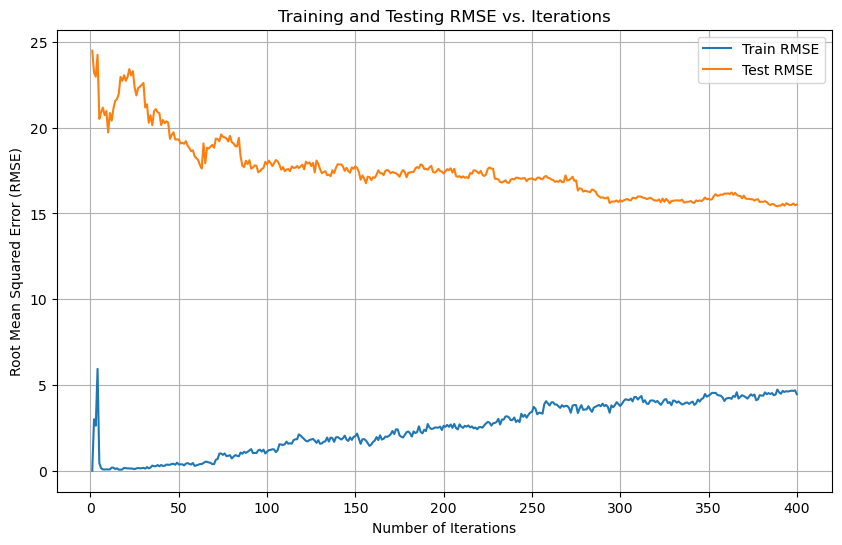

In [61]:

model = GradientBoostingRegressor(**best_params)


train_rmse = []
test_rmse = []


for i in range(1, 401):  
    model.fit(x_train[:i], y_train[:i])  
    y_train_pred = model.predict(x_train[:i])
    y_test_pred = model.predict(x_test)
    train_rmse.append(np.sqrt(mean_squared_error(y_train[:i], y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))


# Plotting the RMSE values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 401), train_rmse, label='Train RMSE')
plt.plot(range(1, 401), test_rmse, label='Test RMSE')
plt.xlabel('Number of Iterations')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Training and Testing RMSE vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()